# Multiple Linear Regression for RB PPR Fantasy Football Production

In [111]:
library(tidyverse)
library(nflfastR)
library(broom)
library(kableExtra)
library(nflreadr)
library(nflplotR)

In [112]:
ps <- load_player_stats(2021:2024)

In [113]:
ps_fantasy <- ps |>
    group_by(player_id, season) |>
    filter(season_type != "POST") |>
    mutate(season_fantasy_points_ppr = sum(fantasy_points_ppr, na.rm = TRUE)) |>
    ungroup()

In [114]:
ps_fantasy <- ps_fantasy |>
    mutate(fantasy_points_ppr_pergame = season_fantasy_points_ppr / 17)

In [115]:
ps_fantasy |>
    rename(player = player_display_name) 

player_id,player_name,player,position,position_group,headshot_url,season,week,season_type,team,⋯,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance,fantasy_points,fantasy_points_ppr,season_fantasy_points_ppr,fantasy_points_ppr_pergame
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
00-0019596,T.Brady,Tom Brady,QB,QB,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/q7dpdlxyu5rs05rgh1le",2021,1,REG,TB,⋯,NA,0,0,0,0,0,27.16,27.16,374.74,22.04352941
00-0022824,A.Lee,Andy Lee,P,SPEC,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/bfozbs2h9jueavslvw3z",2021,1,REG,ARI,⋯,NA,0,0,0,0,0,0.00,0.00,-2.00,-0.11764706
00-0022924,B.Roethlisberger,Ben Roethlisberger,QB,QB,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/vziogpnyp9d0xtpiuqhr",2021,1,REG,PIT,⋯,NA,0,0,0,0,0,12.02,12.02,218.10,12.82941176
00-0023252,R.Gould,Robbie Gould,K,SPEC,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/uakpiwhnutg2rvoyrmgh",2021,1,REG,SF,⋯,1,0,0,0,0,0,0.00,0.00,0.00,0.00000000
00-0023459,Aa.Rodgers,Aaron Rodgers,QB,QB,"https://static.www.nfl.com/image/upload/f_auto,q_auto/league/dypvakakxhccxs67tb0y",2021,1,REG,GB,⋯,NA,0,0,0,0,0,1.32,1.32,333.30,19.60588235
00-0023682,R.Fitzpatrick,Ryan Fitzpatrick,QB,QB,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/pkhhxwplsawnhln9rsun",2021,1,REG,WAS,⋯,NA,0,0,0,0,0,0.72,0.72,0.72,0.04235294
00-0023853,M.Prater,Matt Prater,K,SPEC,"https://static.www.nfl.com/image/upload/f_auto,q_auto/league/mwlrdghrm5chsum2kzic",2021,1,REG,ARI,⋯,1,0,0,0,0,0,0.00,0.00,0.00,0.00000000
00-0024243,M.Lewis,Marcedes Lewis,TE,TE,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/ppq07tipygpftz5csipx",2021,1,REG,GB,⋯,NA,0,0,0,0,0,1.90,2.90,44.40,2.61176471
00-0024417,S.Koch,Sam Koch,P,SPEC,"https://static.www.nfl.com/image/private/f_auto,q_auto/league/dw34lcf6qit1i1knjhpv",2021,1,REG,BAL,⋯,NA,0,0,0,0,0,0.00,0.00,0.00,0.00000000


# Consistency Analysis

In [116]:
ps_fantasy |>
    filter(position == "RB") |>
    select(fantasy_points_ppr_pergame, carries,
     rushing_yards, rushing_tds, rushing_first_downs,
     rushing_epa, receptions, targets, receiving_yards,
     receiving_tds, receiving_epa) |>
    cor(use = 'complete.obs' )

,fantasy_points_ppr_pergame,carries,rushing_yards,rushing_tds,rushing_first_downs,rushing_epa,receptions,targets,receiving_yards,receiving_tds,receiving_epa
fantasy_points_ppr_pergame,1.00000000,0.575560280,0.52235200,0.31763655,0.47743866,0.037358371,0.36015728,0.37065389,0.29500094,0.15446698,0.072116514
carries,0.57556028,1.000000000,0.84856888,0.43287558,0.78999101,-0.002949105,0.19721004,0.20003316,0.16139301,0.06875116,0.063707780
rushing_yards,0.52235200,0.848568884,1.00000000,0.47260288,0.84829871,0.385377746,0.14065062,0.13541204,0.11367352,0.08180177,0.055884896
rushing_tds,0.31763655,0.432875579,0.47260288,1.00000000,0.54910516,0.370275144,0.07548555,0.07089074,0.10179794,0.01720764,0.070131648
rushing_first_downs,0.47743866,0.789991006,0.84829871,0.54910516,1.00000000,0.392963275,0.15066079,0.13927469,0.11945755,0.06939966,0.057069563
rushing_epa,0.03735837,-0.002949105,0.38537775,0.37027514,0.39296327,1.000000000,-0.04300471,-0.06677848,-0.02774609,0.02915827,0.007170531
receptions,0.36015728,0.197210044,0.14065062,0.07548555,0.15066079,-0.043004712,1.00000000,0.91132658,0.74638395,0.24275876,0.212936929
targets,0.37065389,0.200033159,0.13541204,0.07089074,0.13927469,-0.066778477,0.91132658,1.00000000,0.67735435,0.20171407,0.039311472
receiving_yards,0.29500094,0.161393012,0.11367352,0.10179794,0.11945755,-0.027746086,0.74638395,0.67735435,1.00000000,0.32894568,0.572434394
receiving_tds,0.15446698,0.068751164,0.08180177,0.01720764,0.06939966,0.029158272,0.24275876,0.20171407,0.32894568,1.00000000,0.392158434


Carries (0.58) → Moderate positive correlation. More carries generally = more PPR points.

Rushing yards (0.52) → Moderate positive correlation, makes sense since rushing yards directly add to fantasy points.

Rushing TDs (0.32) → Weaker but positive correlation (TDs are valuable but less consistent week-to-week).

Rushing first downs (0.48) → Similar to rushing yards, moderate correlation. Indicates steady usage is tied to fantasy output.

Rushing EPA (0.04) → Very weak correlation. Efficiency doesn’t matter much compared to pure volume for fantasy scoring.

Receptions (0.36) → Moderate positive correlation. In PPR scoring, catches add direct value.

Targets (0.37) → Similar to receptions, logical since targets = opportunities.

Receiving yards (0.30) → Weaker but positive correlation.

Receiving TDs (0.15) → Very weak correlation—receiving TDs are rare events, so not strongly predictive per game.

Receiving EPA (0.07) → Almost no correlation, again showing efficiency isn’t what drives fantasy points.

Takeaway: Volume > Efficiency Fantasy scoring in PPR is much more volume-driven (carries, yards, receptions, targets) than efficiency-driven (EPA). Touchdowns matter, but not as consistently per game as volume stats.


# Season Performance Analysis

In [117]:
ps_fantasy |>
    filter(position == "RB") |>
    select(season_fantasy_points_ppr, carries,
     rushing_yards, rushing_tds, rushing_first_downs,
     rushing_epa, receptions, targets, receiving_yards,
     receiving_tds, receiving_epa) |>
    cor(use = 'complete.obs' )

,season_fantasy_points_ppr,carries,rushing_yards,rushing_tds,rushing_first_downs,rushing_epa,receptions,targets,receiving_yards,receiving_tds,receiving_epa
season_fantasy_points_ppr,1.00000000,0.575560280,0.52235200,0.31763655,0.47743866,0.037358371,0.36015728,0.37065389,0.29500094,0.15446698,0.072116514
carries,0.57556028,1.000000000,0.84856888,0.43287558,0.78999101,-0.002949105,0.19721004,0.20003316,0.16139301,0.06875116,0.063707780
rushing_yards,0.52235200,0.848568884,1.00000000,0.47260288,0.84829871,0.385377746,0.14065062,0.13541204,0.11367352,0.08180177,0.055884896
rushing_tds,0.31763655,0.432875579,0.47260288,1.00000000,0.54910516,0.370275144,0.07548555,0.07089074,0.10179794,0.01720764,0.070131648
rushing_first_downs,0.47743866,0.789991006,0.84829871,0.54910516,1.00000000,0.392963275,0.15066079,0.13927469,0.11945755,0.06939966,0.057069563
rushing_epa,0.03735837,-0.002949105,0.38537775,0.37027514,0.39296327,1.000000000,-0.04300471,-0.06677848,-0.02774609,0.02915827,0.007170531
receptions,0.36015728,0.197210044,0.14065062,0.07548555,0.15066079,-0.043004712,1.00000000,0.91132658,0.74638395,0.24275876,0.212936929
targets,0.37065389,0.200033159,0.13541204,0.07089074,0.13927469,-0.066778477,0.91132658,1.00000000,0.67735435,0.20171407,0.039311472
receiving_yards,0.29500094,0.161393012,0.11367352,0.10179794,0.11945755,-0.027746086,0.74638395,0.67735435,1.00000000,0.32894568,0.572434394
receiving_tds,0.15446698,0.068751164,0.08180177,0.01720764,0.06939966,0.029158272,0.24275876,0.20171407,0.32894568,1.00000000,0.392158434


Carries (0.57) – Strongest correlation → more carries = more total fantasy points across a season.

Rushing yards (0.52) – Strong link, yards accumulate over time.

Rushing first downs (0.47) – Usage indicator, strong correlation with season fantasy output.

Targets (0.37) – Passing-game opportunity strongly tied to season fantasy totals.

Receptions (0.36) – Direct scoring in PPR.

Rushing TDs (0.32) – Contributes, but less consistent across a season than volume.

Receiving yards (0.30) – Positive correlation, but weaker than rushing yards.

Receiving TDs (0.15) – Touchdowns are helpful but volatile over a season.

Receiving EPA (0.07) – Almost no correlation.

Rushing EPA (0.04) – Basically irrelevant for fantasy points.

Almost Identical to per game metrics


# EDA Plots

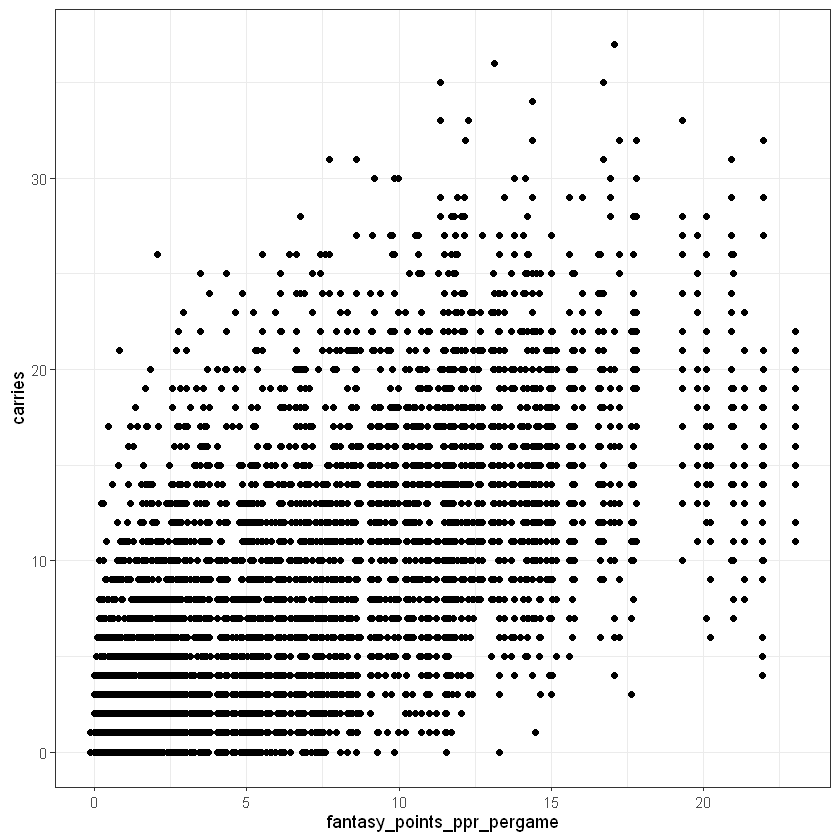

In [118]:

ps_fantasy |>
    filter(position == "RB") |> 
    ggplot(aes(x = fantasy_points_ppr_pergame, y = carries)) +
    geom_point() +
    theme_bw() 


In [119]:
sc <- load_snap_counts(2021:2024)

In [120]:
sc <- sc |>
    group_by(player, season) |>
    filter(game_type != "POST") |>
    mutate(season_snaps = sum(offense_snaps, na.rm = TRUE)) |>
    ungroup()

In [121]:
ps_fantasy_rbs <- ps_fantasy |>
    filter(position == "RB") 


Warning message in inner_join(select(sc, player, season, season_snaps), select(ps_fantasy_rbs, :
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 9 of `x` matches multiple rows in `y`.
ℹ Row 31 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


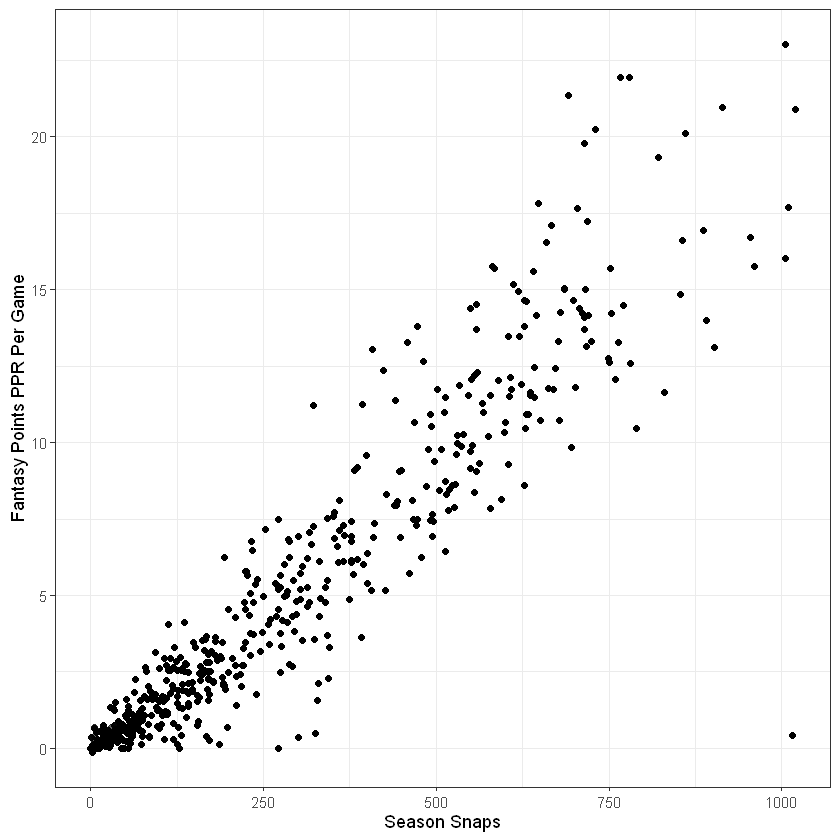

In [122]:
# Merge sc and ps_fantasy by player and season
merged_df <- sc |>
    select(player, season, season_snaps) |>
    inner_join(ps_fantasy_rbs |> select(player_display_name, season, fantasy_points_ppr_pergame, carries, targets, rushing_tds, receiving_tds),
               by = c("player" = "player_display_name", "season" = "season"))

# Scatter plot: season_snaps vs fantasy_points_ppr_pergame
merged_df |>
    ggplot(aes(x = season_snaps, y = fantasy_points_ppr_pergame)) +
    geom_point(alpha = 0.6) +
    labs(x = "Season Snaps", y = "Fantasy Points PPR Per Game") +
    theme_bw()

# Model Creation

In [123]:
expected_fpoints_model <- lm(
fantasy_points_ppr_pergame ~ 
 1 + carries + rushing_yards + rushing_tds + rushing_first_downs + 
 receptions + targets + receiving_yards + receiving_tds,
 data = ps_fantasy_rbs)

In [124]:
print(summary(expected_fpoints_model))


Call:
lm(formula = fantasy_points_ppr_pergame ~ 1 + carries + rushing_yards + 
    rushing_tds + rushing_first_downs + receptions + targets + 
    receiving_yards + receiving_tds, data = ps_fantasy_rbs)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1299  -2.1624  -0.5276   2.1061  15.4189 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.794750   0.073360  24.465  < 2e-16 ***
carries              0.334785   0.014861  22.528  < 2e-16 ***
rushing_yards        0.021007   0.003261   6.443 1.26e-10 ***
rushing_tds          0.835251   0.109580   7.622 2.87e-14 ***
rushing_first_downs -0.119291   0.051146  -2.332   0.0197 *  
receptions           0.127834   0.082099   1.557   0.1195    
targets              0.583013   0.061919   9.416  < 2e-16 ***
receiving_yards      0.005747   0.004766   1.206   0.2279    
receiving_tds        0.963364   0.193398   4.981 6.49e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 

R² = 0.55 → About 55% of the variation in fantasy points per game is explained by these variables. That’s reasonably strong for sports performance, where variance is high.

Adjusted R² ≈ 0.55 → Similar to R², so the predictors included are genuinely useful, not just padding.

 p < 2.2e-16 → The overall model is highly significant.

In [125]:
install.packages("car")

Warning message:
"package 'car' is in use and will not be installed"


In [126]:
library("car")

In [127]:
vif_values <- vif(expected_fpoints_model)

In [128]:
print(vif_values)

            carries       rushing_yards         rushing_tds rushing_first_downs 
           5.137909            6.446821            1.516220            5.154514 
         receptions             targets     receiving_yards       receiving_tds 
          10.798600            8.936512            3.071500            1.153615 


Multicollinearity is clearly at play:

Receptions vs. Targets (highly correlated).

Rushing yards vs. Carries.

Rushing first downs overlaps with both carries and yards

Creating a new model removing receptions, rushing yards, recieving yards, and rushing first downs

In [129]:
model2 <- lm(
fantasy_points_ppr_pergame ~ 
 1 + carries + rushing_tds + targets + receiving_tds,
 data = ps_fantasy_rbs)

In [130]:
print(summary(model2))


Call:
lm(formula = fantasy_points_ppr_pergame ~ 1 + carries + rushing_tds + 
    targets + receiving_tds, data = ps_fantasy_rbs)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.537  -2.165  -0.532   2.137  15.467 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.780234   0.073561  24.201  < 2e-16 ***
carries       0.399758   0.008001  49.963  < 2e-16 ***
rushing_tds   0.902138   0.101898   8.853  < 2e-16 ***
targets       0.701810   0.023033  30.470  < 2e-16 ***
receiving_tds 1.137846   0.186788   6.092 1.19e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.617 on 6104 degrees of freedom
Multiple R-squared:  0.5483,	Adjusted R-squared:  0.548 
F-statistic:  1853 on 4 and 6104 DF,  p-value: < 2.2e-16



R² = 0.54 vs. 0.54 before →  lost less than 1% of explanatory power while cutting half the predictors.

Adjusted R² = 0.54 → Strong, and essentially the same as before.

Carries and targets are the two dominant “volume” metrics for predicting RB fantasy scoring.

Touchdowns matter, but in regression terms they do not fully show the raw 6 points because their effect is partly absorbed by volume stats.

Simplified model ≈ same R² as the full model → suggests the dropped variables were redundant.

Higher F Statistic → the simplified model is more statistically significant overall.

In [131]:
model3 <- lm(
fantasy_points_ppr_pergame ~ 
 1 + carries + rushing_tds + targets + receiving_tds + season_snaps,
 data = merged_df)

In [132]:
print(summary(model3))


Call:
lm(formula = fantasy_points_ppr_pergame ~ 1 + carries + rushing_tds + 
    targets + receiving_tds + season_snaps, data = merged_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.5109  -1.1536  -0.0973   0.8733   8.6778 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.504e-01  1.247e-02  -60.16   <2e-16 ***
carries        7.515e-02  1.335e-03   56.28   <2e-16 ***
rushing_tds    7.085e-01  1.415e-02   50.07   <2e-16 ***
targets        1.019e-01  3.457e-03   29.46   <2e-16 ***
receiving_tds  6.582e-01  2.550e-02   25.82   <2e-16 ***
season_snaps   1.785e-02  3.833e-05  465.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.947 on 86869 degrees of freedom
Multiple R-squared:  0.8734,	Adjusted R-squared:  0.8734 
F-statistic: 1.199e+05 on 5 and 86869 DF,  p-value: < 2.2e-16



Model 3 with included snap counts 
.32 increase in R squared and huge increase in F statistic.

In [133]:
merged_df

player,season,season_snaps,fantasy_points_ppr_pergame,carries,targets,rushing_tds,receiving_tds
<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Derrick Henry,2021,441,11.37058824,17,4,0,0
Derrick Henry,2021,441,11.37058824,35,6,3,0
Derrick Henry,2021,441,11.37058824,28,3,0,0
Derrick Henry,2021,441,11.37058824,33,2,1,0
Derrick Henry,2021,441,11.37058824,29,0,3,0
Derrick Henry,2021,441,11.37058824,20,3,3,0
Derrick Henry,2021,441,11.37058824,29,2,0,0
Derrick Henry,2021,441,11.37058824,28,0,0,0
Jeremy McNichols,2021,269,4.32941176,2,4,0,0


In [134]:
residuals <- model3$residuals

merged_df <- merged_df |>
    mutate(expected_fantasy_points_per_game = merged_df$fantasy_points_ppr_pergame + residuals)

In [135]:
filter(merged_df, season == 2024) |>
    select(player, season, fantasy_points_ppr_pergame, expected_fantasy_points_per_game) |>
    distinct(player, .keep_all = TRUE) |>
    arrange(desc(expected_fantasy_points_per_game)) |>
    print()

# A tibble: 144 × 4
   player         season fantasy_points_ppr_pergame expected_fantasy_points_pe…¹
   <chr>           <int>                      <dbl>                        <dbl>
 1 Jahmyr Gibbs     2024                       21.3                         29.0
 2 Derrick Henry    2024                       19.8                         25.7
 3 Bijan Robinson   2024                       20.1                         23.7
 4 De'Von Achane    2024                       17.6                         21.3
 5 Josh Jacobs      2024                       17.2                         20.9
 6 Saquon Barkley   2024                       20.9                         20.3
 7 James Cook       2024                       15.7                         20.0
 8 Bucky Irving     2024                       14.4                         18.7
 9 Alvin Kamara     2024                       15.6                         18.2
10 Chase Brown      2024                       15                           18.0
# ℹ 134 

In [136]:
currentrbs <- load_player_stats(2025)

In [172]:
 currentrbs |>
    mutate(season_fantasy_points_ppr = sum(fantasy_points_ppr, na.rm = TRUE)) |>
    mutate(fantasy_points_ppr_pergame = season_fantasy_points_ppr / 5) |>
    mutate(volume = carries + targets) |>
    mutate(totalTDs = rushing_tds + receiving_tds) |>
    filter(position == "RB") |>
    select(week, player_display_name, volume, totalTDs) |>
    arrange(desc(volume)) |>
    print( n = 20)

── nflverse player stats: week level ───────────────────────────────────────────

ℹ Data updated: 2025-10-07 04:30:19 CDT



# A tibble: 458 × 4
    week player_display_name volume totalTDs
   <int> <chr>                <int>    <int>
 1     1 Christian McCaffrey     32        0
 2     3 Christian McCaffrey     32        0
 3     5 Christian McCaffrey     31        1
 4     3 Bucky Irving            29        0
 5     3 Jahmyr Gibbs            28        2
 6     4 Christian McCaffrey     28        1
 7     2 Alvin Kamara            27        0
 8     2 Jonathan Taylor         27        1
 9     2 Bijan Robinson          27        0
10     4 Cam Skattebo            27        0
11     5 Rico Dowdle             27        1
12     3 Omarion Hampton         26        1
13     4 Josh Jacobs             26        2
14     4 James Cook              26        1
15     2 Javonte Williams        25        1
16     3 Josh Jacobs             25        0
17     4 Kenneth Gainwell        25        2
18     4 Quinshon Judkins        25        1
19     5 Quinshon Judkins        25        0
20     1 Chase Brown             24

In [147]:
library("ggrepel")

Warning message in plot_theme(plot):
"The `plot.xys` theme element is not defined in the element hierarchy."


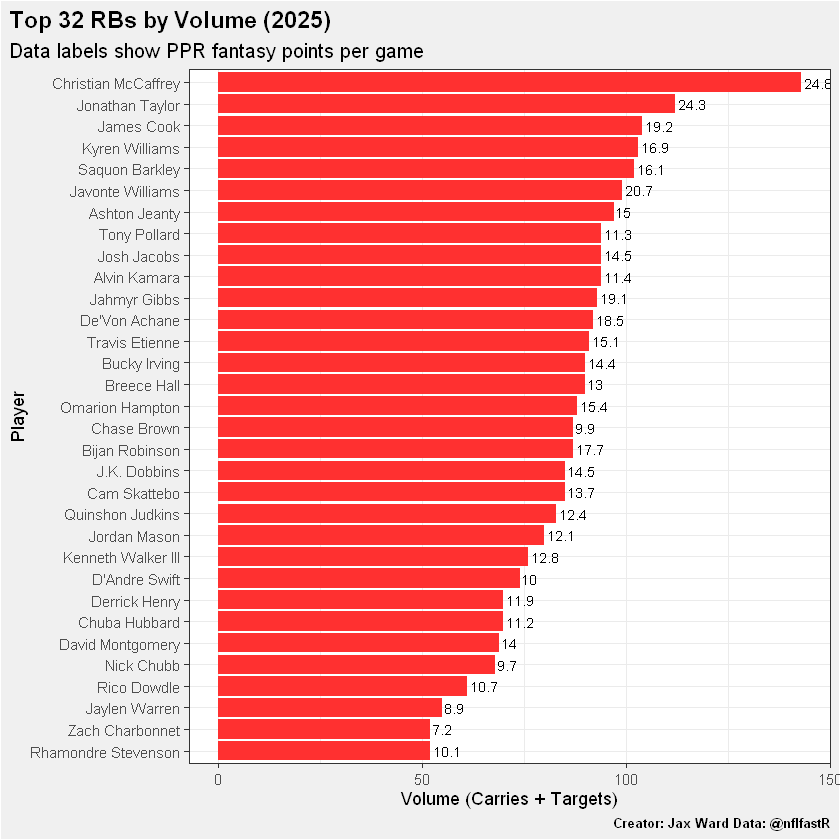

In [169]:
currentrbs |>
    filter(position == "RB") |>
    mutate(volume = carries + targets) |>
    group_by(player_display_name) |>
    summarise(
        volume = sum(volume, na.rm = TRUE),
        fantasy_points_ppr_pergame = sum(fantasy_points_ppr, na.rm = TRUE) / 5
    ) |>
    arrange(desc(volume)) |>
    slice_head(n = 32) |>
    ggplot(aes(x = reorder(player_display_name, volume), y = volume)) +
    geom_bar(stat = "identity", fill = "firebrick1") +
    geom_text(aes(label = round(fantasy_points_ppr_pergame, 1)), hjust = -0.1, size = 3) +
    coord_flip() +
    labs(
     x = "Player",
     y = "Volume (Carries + Targets)",
     caption = "Creator: Jax Ward Data: @nflfastR",
     subtitle = "Data labels show PPR fantasy points per game",
     title = "Top 32 RBs by Volume (2025)") +
    theme_bw() +
    theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 12),
    plot.xys = element_text(size = 10,face = "bold"),
    plot.title.position = "plot",
    plot.caption = element_text(size = 8, face = "bold"),
    plot.background = element_rect(fill = "#F0F0F0")
   ) 


In [148]:
currentrbs |>
    filter(position == "RB") |>
    mutate(volume = carries + targets) |>
    group_by(player_display_name) |>
    summarise(volume = sum(volume, na.rm = TRUE)) |>
    arrange(desc(volume)) |>
    slice_head(n = 32) |>
    ggplot(aes(x = reorder(player_display_name, volume), y = volume, label = fantasy_points_ppr_pergame)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    coord_flip() +
    labs(x = "Player", y = "Volume (Carries + Targets)", title = "Top 32 RBs by Volume (2025)") +
    theme_bw()

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'fantasy_points_ppr_pergame' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if 